<a href="https://colab.research.google.com/github/Reubenpt123/DAV/blob/main/Neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import *
from keras.utils import np_utils
from imblearn.base import BaseSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
import imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
cd ../cefas_smartBuoy

d:\My Drive\Colab Notebooks\DAV Assessment\cefas_smartBuoy


In [ ]:
df = pd.read_csv('clean_data.csv', parse_dates = ['dateTime'])
df = df.set_index('dateTime')
df = df[df['phase'] == 0]
df = df.drop(['phase', 'par_0', 'par_1', 'par_2', 'kd', 'o2'], axis = 1)

df1 = pd.read_csv('..\CMEMS_Data\CMEMS_SST_SSS.csv', parse_dates = ['Unnamed: 0'])
df1 = df1.rename(columns = {'Unnamed: 0' : 'dateTime', 'CMEMS_SST' : 'surf_temp', 'CMEMS_SSS' : 'surf_sal'})
df1 = df1.set_index('dateTime')
df1 = df1['2002-08-28 14:00:00':'2009-10-04 23:00:00']
df1

df2 = pd.read_csv('..\CMEMS_Data\CMEMS_Chl_O2.csv', parse_dates = ['Unnamed: 0'])
df2 = df2.rename(columns = {'Unnamed: 0' : 'dateTime', 'CMEMS_Chl' : 'surf_chl', 'CMEMS_O2' : 'surf_o2'})
df2 = df2.set_index('dateTime')
df2

df['roll_temp'] = df['temp'].rolling('1h').mean()
df['roll_sal'] = df['sal'].rolling('1h').mean()
df['roll_ftu'] = df['ftu'].rolling('1h').mean()
df['roll_fluors'] = df['fluors'].rolling('1h').mean()
df = df[df.index.minute == 0]
df = pd.merge(df, df1, how = 'left', left_index = True, right_index = True)
df = df.drop(['temp', 'sal', 'ftu', 'fluors'], axis = 1)
df = df.dropna()

X = df.drop(['roll_fluors'], axis = 1)
X = (X - X.mean())/X.std()
y = df['roll_fluors']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train, y_train, X_test, y_test = X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy()
df

,roll_temp,roll_sal,roll_ftu,roll_fluors,surf_temp,surf_sal
dateTime,,,,,,
2002-08-28 14:00:00,18.7625,34.66125,6.0425,0.6500,18.728,34.719
2002-08-28 15:00:00,18.7400,34.61900,4.2225,0.8100,18.735,34.714
2002-08-28 16:00:00,18.7675,34.62100,2.9675,0.8250,18.772,34.716
2002-08-28 17:00:00,18.8650,34.68925,3.1400,0.9575,18.818,34.725
2002-08-28 18:00:00,18.9200,34.79275,4.8675,0.9175,18.828,34.734
...,...,...,...,...,...,...
2009-10-04 19:00:00,16.9465,34.93300,4.0000,0.8250,16.626,35.058
2009-10-04 20:00:00,16.9310,34.91900,3.7400,0.8450,16.635,35.033
2009-10-04 21:00:00,16.9690,34.95000,5.7950,0.7700,16.672,34.994


In [ ]:
model = Sequential()
model.add(Dense(units = 1000, activation = "relu", input_shape = (5, )))
model.add(Dropout(0.1))
model.add(Dense(units = 500, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(units = 500, activation = "relu"))
model.add(Dense(units = 100, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation = "relu"))
model.summary()
model.compile(loss = "mean_squared_error", optimizer = "adam", metrics=['mean_squared_error'])

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 1000)              6000      
                                                                 
 dropout_20 (Dropout)        (None, 1000)              0         
                                                                 
 dense_46 (Dense)            (None, 500)               500500    
                                                                 
 dropout_21 (Dropout)        (None, 500)               0         
                                                                 
 dense_47 (Dense)            (None, 500)               250500    
                                                                 
 dense_48 (Dense)            (None, 100)               50100     
                                                                 
 dropout_22 (Dropout)        (None, 100)             

In [ ]:
no_epochs = 10
history = model.fit(X_train, y_train, batch_size = 30, epochs = no_epochs, verbose = 1, validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test, verbose = 1)
#print(f"Test loss = {score[0]}")
#print(f"Test accuracy = {score[1]}")

Epoch 1/10
1003/1003 [==============================] - 13s 13ms/step - loss: 2.2344 - mean_squared_error: 2.2344 - val_loss: 1.5870 - val_mean_squared_error: 1.5870
Epoch 2/10
1003/1003 [==============================] - 11s 11ms/step - loss: 1.6085 - mean_squared_error: 1.6085 - val_loss: 1.5457 - val_mean_squared_error: 1.5457
Epoch 3/10
1003/1003 [==============================] - 12s 12ms/step - loss: 1.3788 - mean_squared_error: 1.3788 - val_loss: 1.0258 - val_mean_squared_error: 1.0258
Epoch 4/10
1003/1003 [==============================] - 12s 12ms/step - loss: 1.1640 - mean_squared_error: 1.1640 - val_loss: 1.1804 - val_mean_squared_error: 1.1804
Epoch 5/10
1003/1003 [==============================] - 13s 13ms/step - loss: 1.0297 - mean_squared_error: 1.0297 - val_loss: 0.8982 - val_mean_squared_error: 0.8982
Epoch 6/10
1003/1003 [==============================] - 12s 12ms/step - loss: 0.9698 - mean_squared_error: 0.9698 - val_loss: 0.8006 - val_mean_squared_error: 0.8006
Epoc

In [ ]:
pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, pred_train)))
pred_test = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred_test))) 

940/940 [==============================] - 2s 2ms/step
0.8649012707242212
403/403 [==============================] - 1s 3ms/step
0.8911681798465646


In [ ]:
model.save('final_model.h5')

In [ ]:
#model = keras.models.load_model('model.h5')
pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, pred_train)))
pred_test = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred_test)))
y_pred = model.predict(X)
print(np.sqrt(mean_squared_error(y, y_pred)))

940/940 [==============================] - 2s 2ms/step
0.8649012707242212
403/403 [==============================] - 1s 2ms/step
0.8911681798465646
1343/1343 [==============================] - 3s 2ms/step
0.8728647127711684


C:\Users\709583\AppData\Local\Temp\ipykernel_2492\1937126861.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


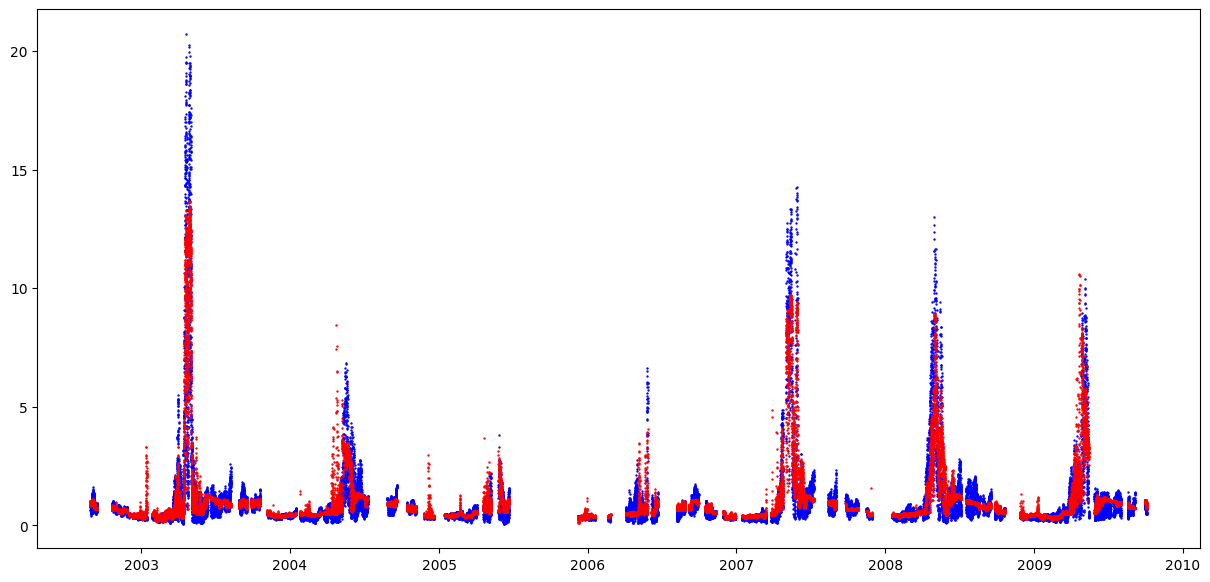

In [ ]:
df['y_pred'] = y_pred
fig, ax = plt.subplots(figsize = (15, 7))
ax.scatter(df.index, df['roll_fluors'], s = 0.5, color = 'blue')
ax.scatter(df.index, df['y_pred'], s = 0.5, color = 'red')
fig.savefig('predictions.png')
fig.show()

C:\Users\709583\AppData\Local\Temp\ipykernel_2492\978024357.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


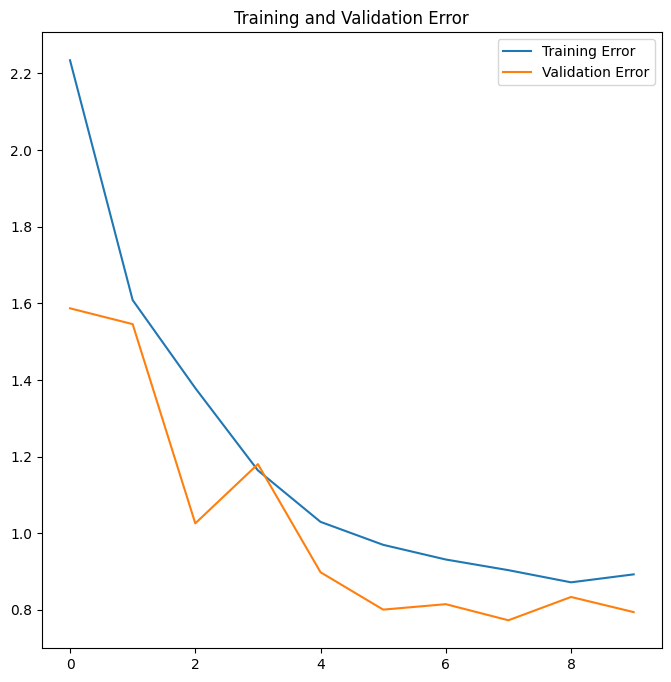

In [ ]:
epochs_range = range(no_epochs)
train_err = history.history['mean_squared_error']
validation_err = history.history['val_mean_squared_error']
train_loss = history.history['loss']
validation_loss = history.history['val_loss']

fig, ax = plt.subplots(figsize = (8,8))
ax.plot(epochs_range, train_err, label = 'Training Error')
ax.plot(epochs_range, validation_err, label = 'Validation Error')
ax.legend(loc = 'upper right')
ax.set_title('Training and Validation Error')
fig.show()

In [ ]:
df3 = pd.read_csv('clean_data.csv', parse_dates = ['dateTime'])
df3 = df3.set_index('dateTime')
df3 = df3[df3['phase'] > 0]
df3 = df3.drop(['phase', 'par_0', 'par_1', 'par_2', 'kd', 'o2'], axis = 1)

df4 = pd.read_csv('..\CMEMS_Data\CMEMS_SST_SSS.csv', parse_dates = ['Unnamed: 0'])
df4 = df4.rename(columns = {'Unnamed: 0' : 'dateTime', 'CMEMS_SST' : 'surf_temp', 'CMEMS_SSS' : 'surf_sal'})
df4 = df4.set_index('dateTime')
df4 = df4['2009-10-05 00:00:00':'2019-12-07 15:30:00']


df3['roll_temp'] = df3['temp'].rolling('1h').mean()
df3['roll_sal'] = df3['sal'].rolling('1h').mean()
df3['roll_ftu'] = df3['ftu'].rolling('1h').mean()
df3['roll_fluors'] = df3['fluors'].rolling('1h').mean()
df3 = df3[df3.index.minute == 0]
df3 = pd.merge(df3, df4, how = 'left', left_index = True, right_index = True)

df3 = df3.drop(['temp', 'sal', 'ftu', 'fluors'], axis = 1)
df3 = df3.dropna()

X_1 = df3.drop(['roll_fluors'], axis = 1)
X_1 = (X_1 - X_1.mean())/X_1.std()
y_1 = df3['roll_fluors']

y_1_pred = model.predict(X_1)
print(np.sqrt(mean_squared_error(y_1, y_1_pred)))


1904/1904 [==============================] - 6s 3ms/step
1.6239749314225438


C:\Users\709583\AppData\Local\Temp\ipykernel_2492\1914953513.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


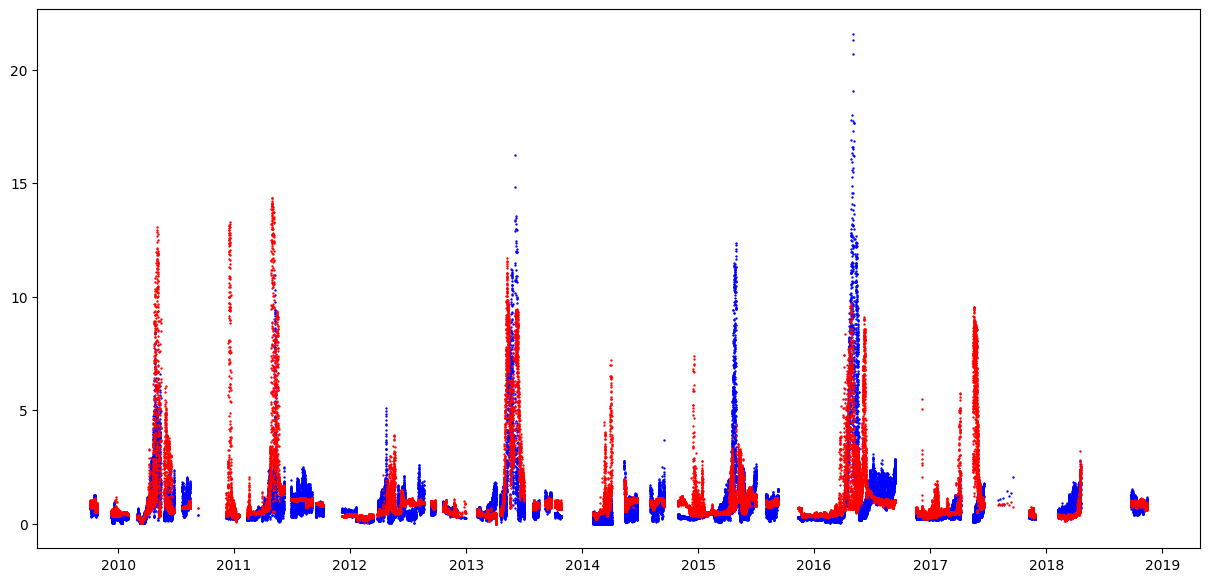

In [ ]:
df3['y_1_pred'] = y_1_pred
fig, ax = plt.subplots(figsize = (15, 7))
ax.scatter(df3.index, df3['roll_fluors'], s = 0.5, color = 'blue')
ax.scatter(df3.index, df3['y_1_pred'], s = 0.5, color = 'red')
fig.savefig('future_predictions.png')
fig.show()